# Correlación entre contaminantes

Para un análisis exploratorio de los datos, se eligieron 3 estaciones de las 69 disponibles en el catálogo de Aire-Cdmx. Las estaciones en cuestión se encuentran en puntos estratégicos de la ciudad, como el norte (MGH - Miguel Hidaldo, centro (HGM - Hospital General de México) y sur (TLA - Tláhuac) de la misma.

Se calcula la correlacion entre las variables (contaminantes y meteorológicas) de los datos medidos de estas tres estaciones para el año 2018.

El objetivo es encontrar que variables tienen mejor correlación entr4e sí para poder aplicar esto a un modelo predictivo.

In [1]:
# Se importan bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se importa el archivo csv con los datos usando pandas

data_18 = pd.read_csv("merge_cont_2018.csv")

In [3]:
data_18.head()

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,2018-01-01 01:00:00,1,1,AJM,0.8,2.0,25.0,26.0,31.0,53.0,26.0,6.0,53.0,11.6,1.8,258.0,79.0
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
3,3,2018-01-01 01:00:00,1,1,SAG,0.6,2.0,21.0,23.0,25.0,80.0,45.0,8.0,36.0,15.2,2.2,10.0,125.0
4,4,2018-01-01 01:00:00,1,1,SFE,0.6,1.0,26.0,28.0,26.0,56.0,22.0,7.0,57.0,11.2,1.3,254.0,79.0


In [4]:
estaciones = ['MGH', 'HGM', 'TLA']
data_18 = data_18[(data_18.id_station.isin(estaciones))]

In [5]:
data_18.head(5)

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,5,2018-01-01 01:00:00,1,1,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,8,2018-01-01 02:00:00,1,2,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,9,2018-01-01 02:00:00,1,2,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0


In [6]:
del data_18['Unnamed: 0']

In [7]:
del data_18['month']

In [8]:
del data_18['hour']

In [9]:
data_18.head(6)

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,2018-01-01 01:00:00,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2018-01-01 01:00:00,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,2018-01-01 01:00:00,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,2018-01-01 02:00:00,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,2018-01-01 02:00:00,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0
12,2018-01-01 02:00:00,TLA,0.4,2.0,32.0,34.0,14.0,63.0,27.0,11.0,47.0,12.0,3.0,327.0,90.0


In [10]:
est_prom_18 = data_18.groupby('date').mean()

In [11]:
est_prom_18 = est_prom_18.round(1)
est_prom_18.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [12]:
# Función para hacer el lag

def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [13]:
NON_DER = ['date',]

In [14]:
matriz_total = df_derived_by_shift(est_prom_18, 0, NON_DER)
matriz_total.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [15]:
matriz_total.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,-0.443717,-0.187717,0.504750
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,-0.409744,-0.081767,0.201851
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,-0.438883,-0.112782,0.542671
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,-0.477801,-0.104079,0.350917
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,0.245831,-0.278063,0.260138
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,-0.233046,-0.219645,0.895088
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,0.099761,-0.115288,0.843264
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,-0.057813,0.122212,0.295233
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,-0.243560,0.280997,-0.368545
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,0.323846,-0.259742,0.126433


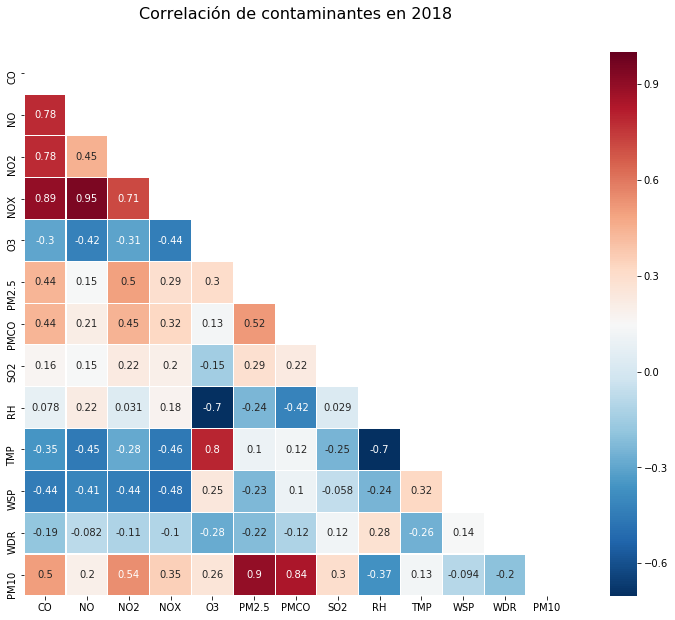

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018', y=1.05, size=16)

mask = np.zeros_like(matriz_total.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Cada 24 hrs

In [ ]:
df_2 = data_18

In [ ]:
df_2['date'] = pd.DatetimeIndex(data_18.date).normalize()
df_2.head()

In [ ]:
est_prom_24hrs = df_2.groupby('date').mean()

In [ ]:
est_prom_24hrs = est_prom_24hrs.round(1)
est_prom_24hrs.head()

In [ ]:
matriz_total_24 = df_derived_by_shift(est_prom_24hrs, 0, NON_DER)
matriz_total_24.head()

In [ ]:
matriz_total_24.corr()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018 cada 24 hrs', y=1.05, size=16)

mask = np.zeros_like(matriz_total_24.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_24.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
data_18.head()